In [1]:
import sys
import os
sys.path.append(os.path.split(os.getcwd())[0])

In [2]:
from pytorch_tabnet.tab_model import TabNetClassifier

from src.dataset import create_dataset
# from src.tabnet import ModelCheckpoint

symbols = ["^SPX", "^DAX", "^BET"]
symbol = symbols[0]

ds = create_dataset(symbol)

x_train, y_train = ds["train"]["X"], ds["train"]["Y"]
x_valid, y_valid = ds["valid"]["X"], ds["valid"]["Y"]
x_test, y_test = ds["test"]["X"], ds["test"]["Y"]

model = TabNetClassifier()

/home/horia/master_siva/dizertatie/repo/venv/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


In [3]:
model.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], eval_metric=['logloss'], patience=0, batch_size=1024,
        #   callbacks=[ModelCheckpoint(model, '.', 10)]
)

/home/horia/master_siva/dizertatie/repo/venv/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.71532 | val_0_logloss: 0.69973 |  0:00:01s
epoch 1  | loss: 0.69462 | val_0_logloss: 0.70585 |  0:00:01s
epoch 2  | loss: 0.69337 | val_0_logloss: 0.70854 |  0:00:01s
epoch 3  | loss: 0.69172 | val_0_logloss: 0.7047  |  0:00:01s
epoch 4  | loss: 0.68413 | val_0_logloss: 0.70166 |  0:00:01s
epoch 5  | loss: 0.6839  | val_0_logloss: 0.69956 |  0:00:01s
epoch 6  | loss: 0.68765 | val_0_logloss: 0.69797 |  0:00:01s
epoch 7  | loss: 0.68477 | val_0_logloss: 0.69962 |  0:00:01s
epoch 8  | loss: 0.6856  | val_0_logloss: 0.7026  |  0:00:02s
epoch 9  | loss: 0.68198 | val_0_logloss: 0.704   |  0:00:02s
epoch 10 | loss: 0.68378 | val_0_logloss: 0.70592 |  0:00:02s
epoch 11 | loss: 0.67968 | val_0_logloss: 0.70826 |  0:00:02s
epoch 12 | loss: 0.67832 | val_0_logloss: 0.70835 |  0:00:02s
epoch 13 | loss: 0.67922 | val_0_logloss: 0.70816 |  0:00:02s
epoch 14 | loss: 0.67874 | val_0_logloss: 0.70705 |  0:00:02s
epoch 15 | loss: 0.67797 | val_0_logloss: 0.70633 |  0:00:02s
epoch 16

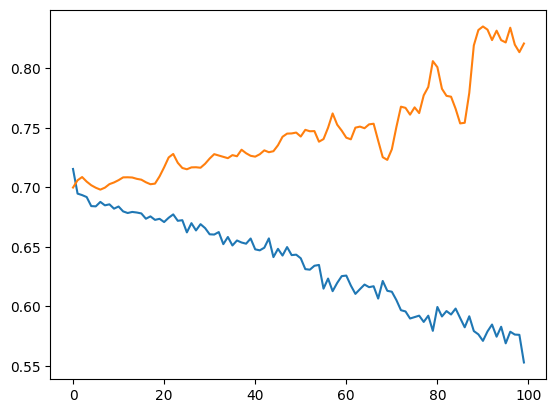

In [4]:
import matplotlib.pyplot as plt

plt.plot(model.history['loss'])
plt.plot(model.history['val_0_logloss'])

In [5]:
from src import plots

In [6]:
plots.loss_curves(model.history['loss'], model.history['val_0_logloss'], '.')

In [7]:
preds = model.predict(x_test)
preds

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0])

In [8]:
y_test

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0])

In [11]:
import numpy as np
np.zeros_like(y_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
from src.eval import calculate_stats

ModuleNotFoundError: No module named 'plots'

In [ ]:
calculate_stats(preds, y_test, '.')